In [1]:
!pip install graphviz

In [2]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_renomear = {
    "mileage_per_year": "milhas_ano",
    "model_year": "ano_modelo",
    "price": "preco",
    "sold": "vendido"
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
a_trocar = {
    "no": 0,
    "yes": 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_modelo'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [7]:
dados['km_ano'] = dados.milhas_ano * 1.61
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_modelo,km_ano
0,0,21801,2000,30941.02,1,20,35099.61
1,1,7843,1998,40557.96,1,22,12627.23
2,2,7109,2006,89627.50,0,14,11445.49
3,3,26823,2015,95276.14,0,5,43185.03
4,4,7935,2014,117384.68,1,6,12775.35


In [8]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_ano','ano_modelo'], axis=1)
dados.head()

,preco,vendido,idade_modelo,km_ano
0,30941.02,1,20,35099.61
1,40557.96,1,22,12627.23
2,89627.50,0,14,11445.49
3,95276.14,0,5,43185.03
4,117384.68,1,6,12775.35


In [9]:
x = dados[['preco', 'idade_modelo', 'km_ano']]
y = dados['vendido']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,stratify = y,
                                                        test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos." %(len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("Acuracia: %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
Acuracia: 58.00%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy_stratified foi %.2f%%" % acuracia)

A acurácia do dummy_stratified foi 52.44%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [12]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy_stratified foi %.2f%%" % acuracia)

A acurácia do dummy_stratified foi 58.00%


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,stratify = y,
                                                        test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos." %(len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("Acuracia: %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
Acuracia: 77.48%


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


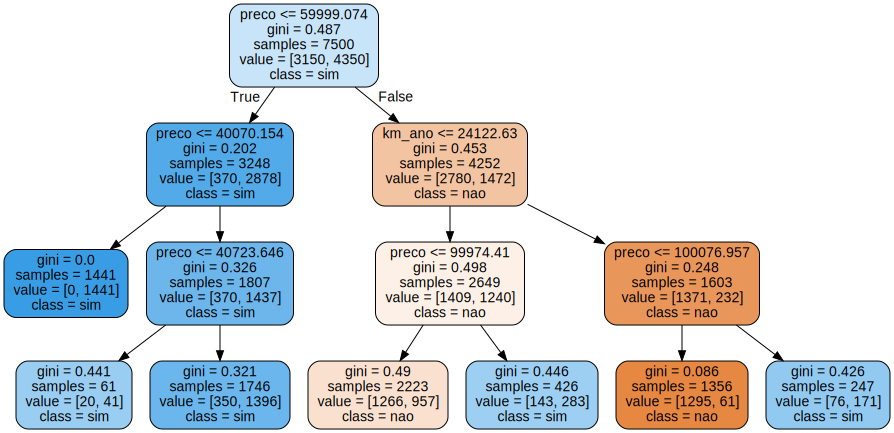

In [28]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                           feature_names=features, class_names=['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico